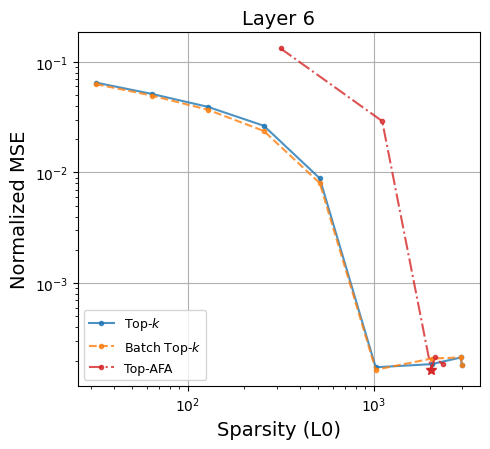

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
layer, df = 6, pd.read_csv("wandb_export_2025-03-27T13_59_12.395-05_00.csv")
# layer, df = 7, pd.read_csv("wandb_export_2025-03-27T13_59_41.831-05_00.csv")
# layer, df = 8, pd.read_csv("wandb_export_2025-03-27T14_00_03.325-05_00.csv")

def parse_name(name):
    parts_underscore = name.split('_')
    parts_dot = name.split('.')
    activation = parts_underscore[-3]
    k = int(parts_underscore[-2])
    layer = parts_dot[1]
    return activation, k, layer

df[['activation', 'k', 'layer']] = df['Name'].apply(lambda name: pd.Series(parse_name(name)))

# Define plot colors
color_map = {
    'topk': 'C0',
    'batchtopk': 'C1',
    'topafa': 'C3'
}

# Initialize plot
plt.figure(figsize=(5, 4.6))

# Plot each activation type with alpha and markers
for act in ['topk', 'batchtopk', 'topafa']:
    subset = df[df['activation'] == act].sort_values(by='l0_norm')

    linestyle = '--' if act == 'batchtopk' else '-.' if act == 'topafa' else '-'
    
    if act == 'batchtopk':
        linestyle = '--'
        label = f'Batch Top-$k$'
    elif act == 'topk':
        linestyle = '-'
        label = f'Top-$k$'
    elif act == 'topafa':
        linestyle = '-.'
        label = f'Top-AFA'
    

    plt.plot(subset['l0_norm'], subset['l2_loss'],
             label=label, color=color_map[act], linestyle=linestyle,
             marker='.', alpha=0.8)

    # Find global minimum point across all activations
    global_min_idx = df['l2_loss'].idxmin()
    global_min_point = df.loc[global_min_idx]
    
    # Highlight global minimum point with star
    if act == global_min_point['activation']:
        plt.plot(global_min_point['l0_norm'], global_min_point['l2_loss'],
                 marker='*', color=color_map[act], markersize=8, alpha=1, zorder=10)


# Apply log scale
plt.xscale('log')
plt.yscale('log')

# Labels and legend with larger fonts
plt.xlabel('Sparsity (L0)', fontsize=14)
plt.ylabel('Normalized MSE', fontsize=14)
plt.title(f'Layer {layer}', fontsize=14)
plt.legend(loc=3, fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.savefig(f'results-layer{layer}.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [2]:
df

,Name,l0_norm,l2_loss,afa_coeff,_wandb,activation,k,layer
0,blocks.6.hook_resid_pre_12288_topk_64_0.0,63.918701,0.051269,0.000000,NaN,topk,64,6
1,blocks.6.hook_resid_pre_12288_topk_128_0.0,127.823730,0.039204,0.000000,NaN,topk,128,6
2,blocks.6.hook_resid_pre_12288_topk_512_0.0,512.000000,0.008853,0.000000,NaN,topk,512,6
3,blocks.6.hook_resid_pre_12288_batchtopk_64_0.0,64.000000,0.049506,0.000000,NaN,batchtopk,64,6
4,blocks.6.hook_resid_pre_12288_batchtopk_128_0.0,128.000000,0.036893,0.000000,NaN,batchtopk,128,6
5,blocks.6.hook_resid_pre_12288_batchtopk_512_0.0,512.000000,0.008027,0.000000,NaN,batchtopk,512,6
6,blocks.6.hook_resid_pre_12288_topafa_0_0.0078125,315.172363,0.132103,0.007812,NaN,topafa,0,6
7,blocks.6.hook_resid_pre_12288_topk_32_0.0,31.983398,0.064884,0.000000,NaN,topk,32,6
8,blocks.6.hook_resid_pre_12288_topk_256_0.0,255.996338,0.026445,0.000000,NaN,topk,256,6
9,blocks.6.hook_resid_pre_12288_topk_1024_0.0,1023.493408,0.000174,0.000000,NaN,topk,1024,6


In [3]:
# Optional: mapping from decimal to fraction strings
inv_map = {
    round(1/128, 2): "1/128",
    round(1/64, 2): "1/64",
    round(1/32, 2): "1/32",
    round(1/24, 2): "1/24",
    round(1/16, 2): "1/16"
}

def format_afa(x):
    if pd.isna(x) or x == 0:
        return '--'
    rounded = round(x, 2)
    inv_map = {
        round(1/128, 2): "1/128",
        round(1/64, 2): "1/64",
        round(1/32, 2): "1/32",
        round(1/24, 2): "1/24",
        round(1/16, 2): "1/16"
    }
    if rounded in inv_map:
        return f"${inv_map[rounded]}$"
    return f"{x:.2f}"

inv_map

{0.01: '1/128', 0.02: '1/64', 0.03: '1/32', 0.04: '1/24', 0.06: '1/16'}

In [4]:
from tabulate import tabulate

# Select and sort columns of interest
columns = ['activation', 'k', 'l0_norm', 'l2_loss', 'afa_coeff']
latex_df = df[columns].copy()

# Add 'Layer' column at the beginning
latex_df.insert(0, 'Layer', layer)

latex_df['k'] = df['k'].apply(lambda x: '--' if x == 0 else int(x))
latex_df['afa_coeff'] = df['afa_coeff'].apply(format_afa)
latex_df['l0_norm'] = latex_df['l0_norm'].apply(lambda x: f"{x:.2f}")

# Find the minimum l2_loss value (compare raw values)
min_l2_value = df['l2_loss'].min()

# Format l2_loss, highlight the minimum with bold+underline
latex_df['l2_loss'] = df['l2_loss'].apply(
    lambda x: f"\\underline{{\\textbf{{{x:.6f}}}}}" if x == min_l2_value else f"{x:.6f}"
)

# Rename activation for display
activation_map = {
    'topk': 'Top-k',
    'batchtopk': 'Batch Top-k',
    'topafa': 'Top-AFA'
}
latex_df['activation'] = latex_df['activation'].map(activation_map)

# Sort with Top-AFA last using custom order
activation_order = {'Top-k': 0, 'Batch Top-k': 1, 'Top-AFA': 2}
latex_df['activation_sort_key'] = latex_df['activation'].map(activation_order)
latex_df = latex_df.sort_values(by=['activation_sort_key', 'k']).drop(columns='activation_sort_key')
latex_df = latex_df[['Layer', 'activation', 'k', 'afa_coeff', 'l0_norm', 'l2_loss']] # ordering

column_labels = ['Layer', 'Activation', '$k$', '$\\lambda_\\text{AFA}$', 'Sparsity (L0)', 'Normalized MSE']
latex_table = tabulate(
    latex_df,
    headers=column_labels,
    tablefmt='latex_raw',
    showindex=False,
    disable_numparse=True
)
latex_table = latex_table.replace(r'\begin{tabular}{llllll}', r'\begin{tabular}{llrlrr}')

print(latex_table)


\begin{tabular}{llrlrr}
\hline
 Layer   & Activation   & $k$   & $\lambda_\text{AFA}$   & Sparsity (L0)   & Normalized MSE                \\
\hline
 6       & Top-k        & 32    & --                     & 31.98           & 0.064884                      \\
 6       & Top-k        & 64    & --                     & 63.92           & 0.051269                      \\
 6       & Top-k        & 128   & --                     & 127.82          & 0.039204                      \\
 6       & Top-k        & 256   & --                     & 256.00          & 0.026445                      \\
 6       & Top-k        & 512   & --                     & 512.00          & 0.008853                      \\
 6       & Top-k        & 1024  & --                     & 1023.49         & 0.000174                      \\
 6       & Top-k        & 2048  & --                     & 2044.21         & 0.000185                      \\
 6       & Top-k        & 4096  & --                     & 2971.20         & 0.000